In [2]:
cd ../Lib

d:\OneDrive\Documents\Monash Research Project T2 2022\HazardousWaste\Lib


In [3]:
from WebScrapping.GoogleSearchSpider import *
from WebScrapping.WebsiteKeywordAnalysisSpider import *
from WebScrapping.SpiderInstance import *

In [4]:
import urllib
import re
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
from slugify import slugify
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from PIL import Image

In [5]:
logging.disable(sys.maxsize)

In [6]:
google_search_results = []
def google_search_results_listener(signal, sender, item, response, spider):
    global google_search_results
    google_search_results.append(item)

In [7]:
keyword_analysis_results = dict()
def keyword_analysis_results_listener(signal, sender, item, response, spider):
    global keyword_analysis_results
    keyword_analysis_results[list(item.keys())[0]] = list(item.values())[0]

In [8]:
result = create_and_run_spider(GoogleSearch, google_search_results_listener, base_url="https://www.google.com.au/search?q={0}&start={1}", tags=['metal', 'e-waste', 'batteries'], pages=2)

In [9]:
for page in google_search_results:
    for website_name, url in page.items():
        result = create_and_run_spider(WebsiteKeywordAnalysis, keyword_analysis_results_listener, base_url=url, website=website_name)

In [10]:
stop_words = [word.strip() for word in open('../Resources/stop-words.txt', 'r').readlines()]

def count_occurrences(text):
    count_vec = CountVectorizer(stop_words=stop_words)
    X = count_vec.fit_transform([text])
    return [X, count_vec]

In [11]:
def get_keyword_occurrences_as_dict(occurrences, vectorizer):
    keywords = vectorizer.get_feature_names_out()
    occurrences = occurrences.toarray()[0]
    return dict(zip(keywords, occurrences))

In [12]:
circle_mask = np.array(Image.open('../Resources/circle.png'))

def draw_word_cloud(keyword_analysis_dict):
    wordcloud = WordCloud(width=1000, height=666, random_state=1, background_color='white', colormap='inferno', collocations=False, mask=circle_mask).generate_from_frequencies(keyword_analysis_dict)
    plt.figure(figsize=(10, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    
def save_word_cloud(keyword_analysis_dict, filename):
    wordcloud = WordCloud(width=1000, height=666, random_state=1, background_color='white', colormap='inferno', collocations=False, mask=circle_mask).generate_from_frequencies(keyword_analysis_dict)
    plt.figure(figsize=(10, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(f'{filename}.png', dpi=300)

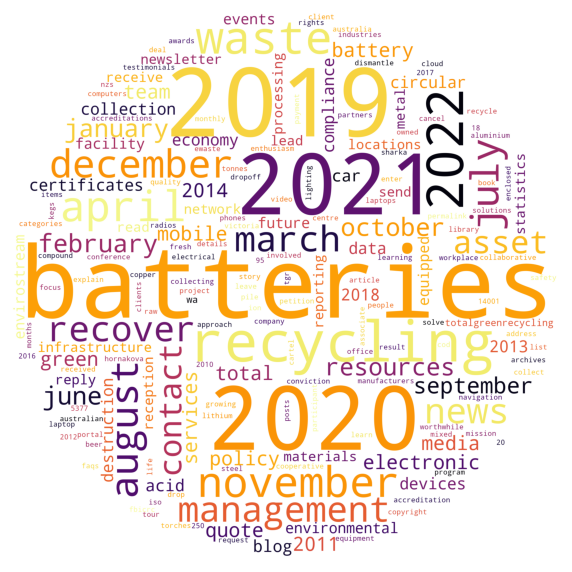

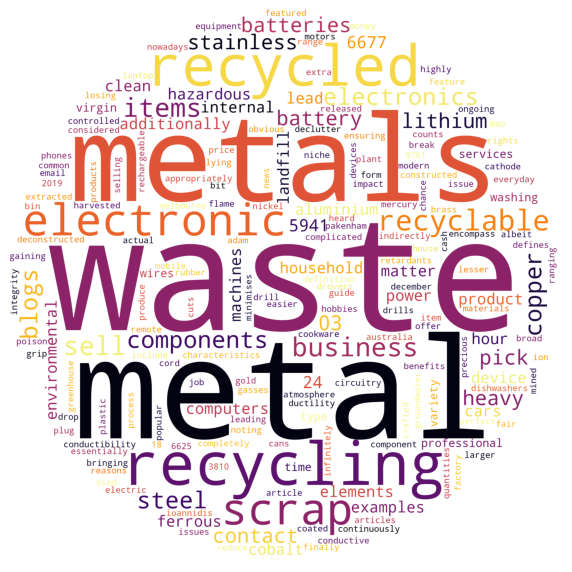

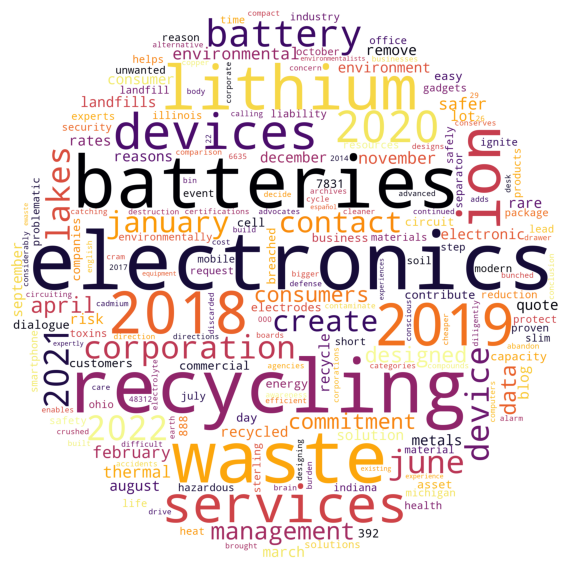

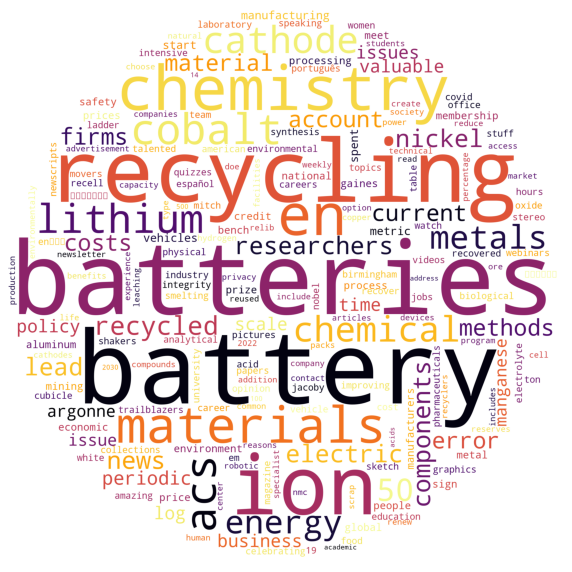

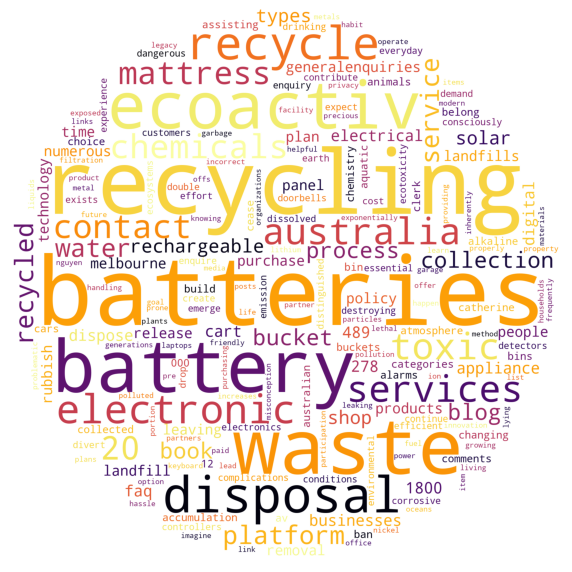

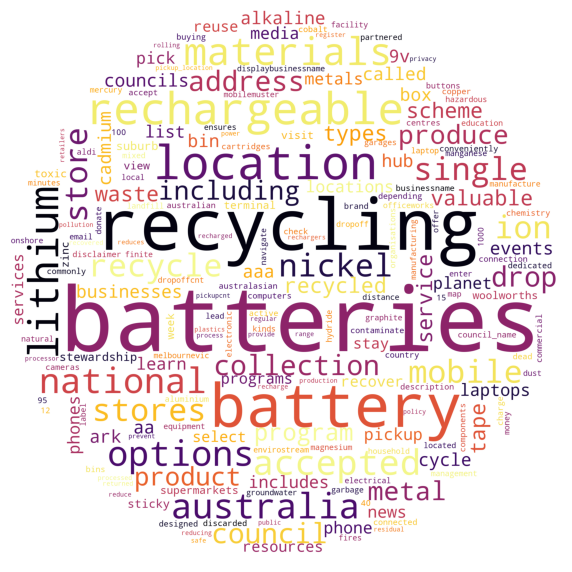

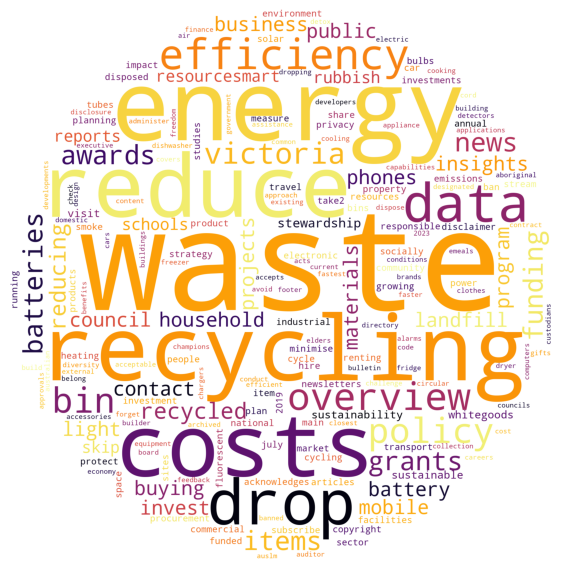

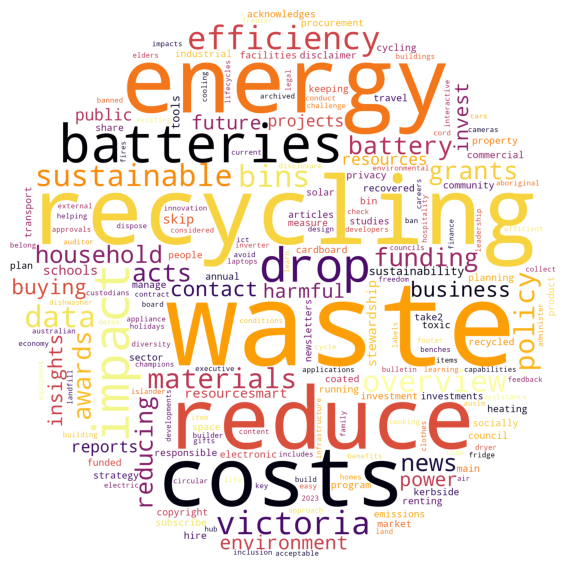

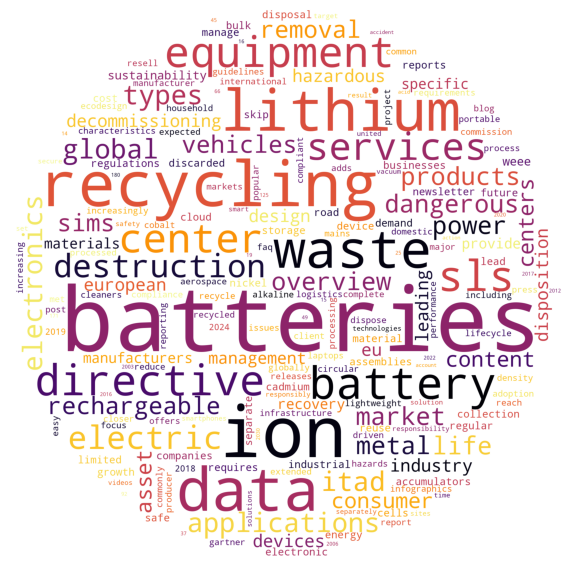

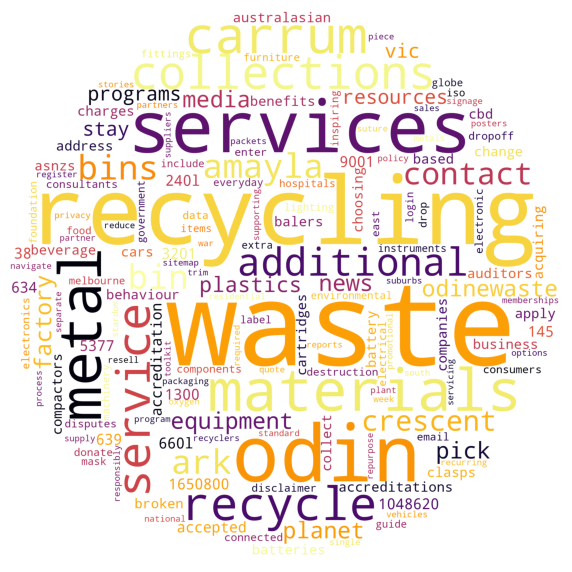

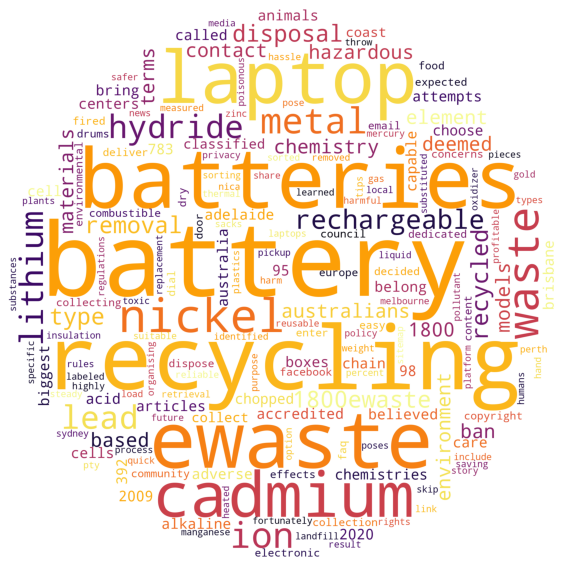

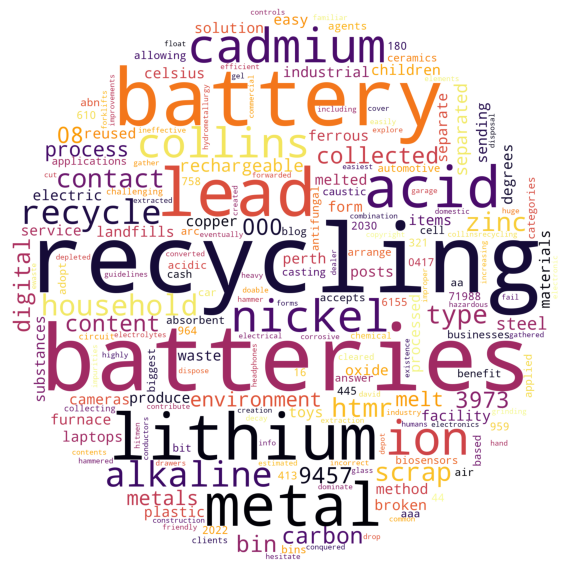

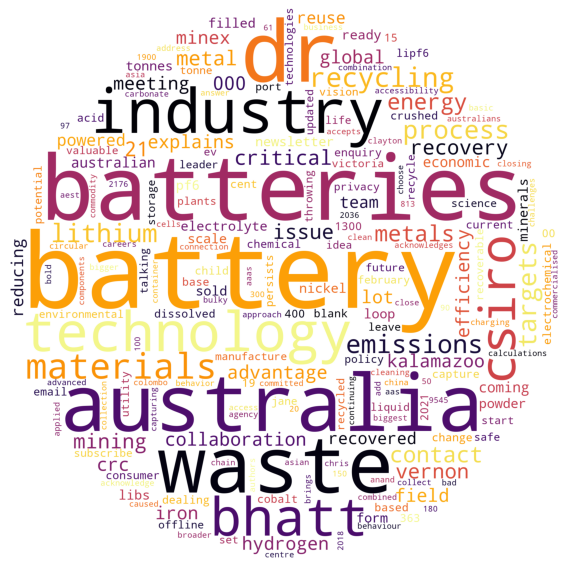

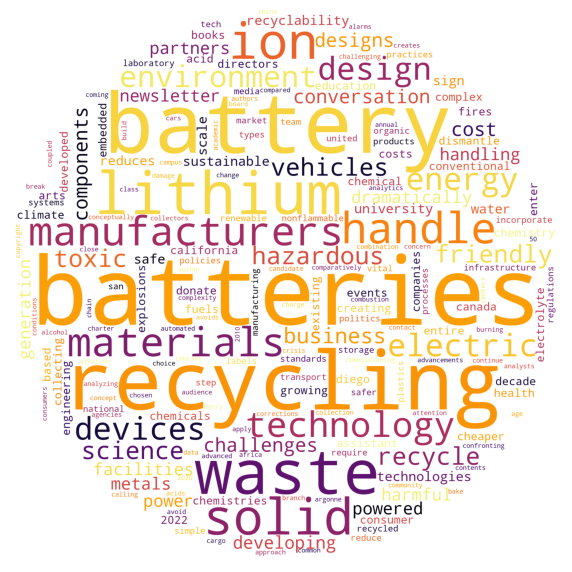

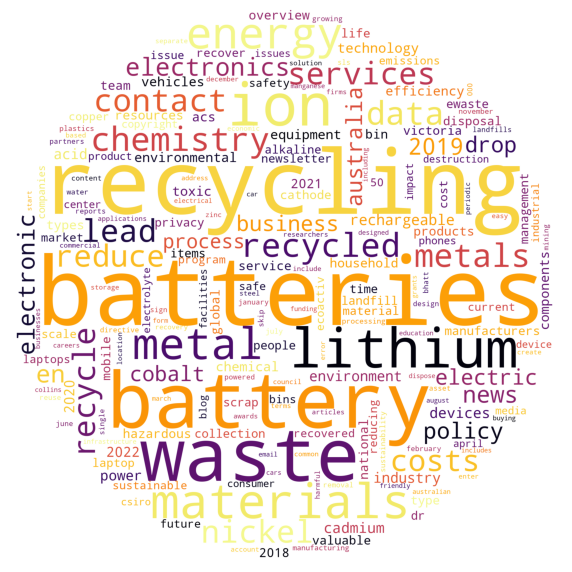

In [13]:
all_text = ""

for website, keyword_text in keyword_analysis_results.items(): 
    keyword_analysis = count_occurrences(keyword_text)
    keyword_analysis_dict = get_keyword_occurrences_as_dict(keyword_analysis[0], keyword_analysis[1])
    save_word_cloud(keyword_analysis_dict, slugify(website))
    all_text = all_text + keyword_text
    
keyword_analysis = count_occurrences(all_text)
keyword_analysis_dict = get_keyword_occurrences_as_dict(keyword_analysis[0], keyword_analysis[1])
save_word_cloud(keyword_analysis_dict, "aggregate")